# Movie Analytics


In [2]:
import pandas as pd
import os

In [4]:
#Check working directory
os.getcwd()

'C:\\Users\\adrane\\PycharmProjects\\Jupyter\\JupyterNotebook'

In [5]:
df_movie = pd.read_csv("Movie-Ratings.csv")

In [6]:
df_movie.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
df_movie.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
#Renaming columns
df_movie.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [13]:
df_movie.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [16]:
#converting film, genre and year to category

df_movie['Film'] = df_movie['Film'].astype('category')
df_movie['Genre'] = df_movie['Genre'].astype('category')
df_movie['Year'] = df_movie['Year'].astype('category')

In [17]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [18]:
df_movie.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Joint Plots

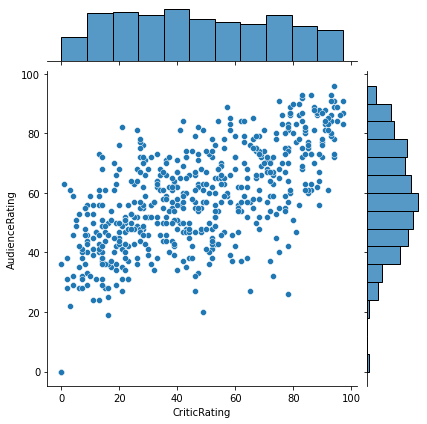

In [21]:
#Joint plots
j = sns.jointplot(data = df_movie, x = 'CriticRating', y = 'AudienceRating')

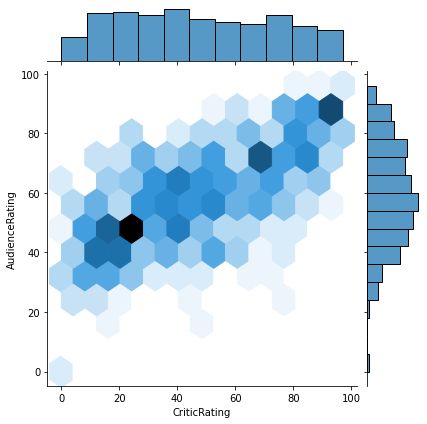

In [23]:
#Change pattern
#hex to detect clusters
j = sns.jointplot(data = df_movie, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

## Histograms

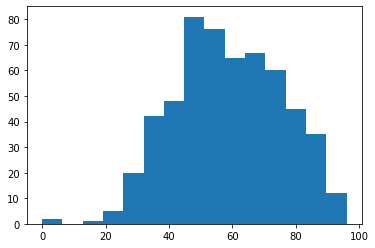

In [29]:
h1 = plt.hist(df_movie['AudienceRating'],bins = 15)

## Stacked Histograms

In [42]:
#budget for drama movies

#filter the dataset for different genres
df_drama = df_movie[df_movie["Genre"] == "Drama"]
df_action = df_movie[df_movie["Genre"] == "Action"]
df_thriller = df_movie[df_movie["Genre"] == "Thriller"]

In [33]:
df_drama

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


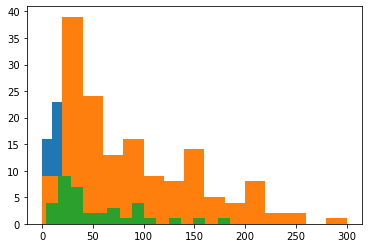

In [44]:
plt.hist(df_drama["BudgetMillions"], bins = 15)
plt.hist(df_action["BudgetMillions"], bins = 15)
plt.hist(df_thriller["BudgetMillions"], bins = 15)
plt.show()

Since the histograms overlap each other, we need to create histograms in such a way that they are stacked on each other

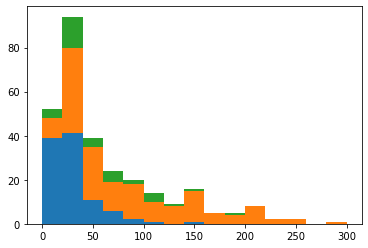

In [47]:
plt.hist([df_drama.BudgetMillions,df_action.BudgetMillions,df_thriller.BudgetMillions], stacked = True, bins = 15)
plt.show()

In [48]:
#Unique categories
df_movie.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

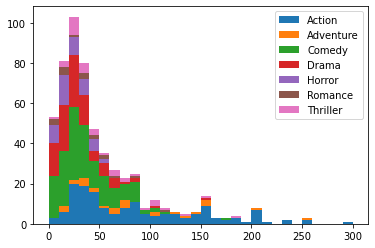

In [61]:
#Iterating over every genre
gen_list = []
mylabels = []
for gen in df_movie.Genre.cat.categories:
    gen_list.append(df_movie[df_movie.Genre == gen].BudgetMillions)
    mylabels.append(gen)

gen_hist = plt.hist(gen_list, bins = 30, stacked = True, rwidth = 1, label = mylabels)
plt.legend()
plt.show()